### word2vec and clustering

In [1]:
import pickle
import re
import nltk.data
import spacy
import gensim
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import pickle
stop_words = stopwords.words('english')
new_words=['court','plaintiff','defend','claims','allege','alleged','state','defendant','mark',
'trial','also','would','defendants','plaintiffs','states','must','supp','raghupathi','wullianallur','educational',
 'wl','use','helena','hernandez','ann','ruth','hernandez','center','seh','law','erik','schlenker'
,'westlaw','fed','division','attorneys','nm','sarah','mcmillan','missoula',
 'citation','et','al','montana','united','information','available','currently','shiloh',
  'smith','attorney','wy','judge','certain','act','department','justice','claim',
   'thomson','reuters','even','cal','rptr','upon','end','set','whether','app','original','motion' ]
stop_words.extend(new_words)


In [3]:
data=pickle.load(open('all_cases.pickle','rb'))

In [5]:
# tokenize sentences in corpus
def filtered():
    wpt = nltk.WordPunctTokenizer()
    tokenized_corpus = [wpt.tokenize(document) for document in data]
    filtered_tokens = [t for token in tokenized_corpus for t in token  if t not in stop_words]
    filtered=[t for t in filtered_tokens if (re.match(r'[^\W\d]*$', t)) and len(t)>2]
    return filtered

In [7]:
from gensim.models import word2vec
def word2vec():
    # Set values for various parameters
    feature_size = 150    # Word vector dimensionality  
    window_context = 50          # Context window size                                                                                    
    min_word_count = 25   # Minimum word count                        
    sample = 1e-3   # Downsample setting for frequent words

    w2v_model = word2vec.Word2Vec(filtered, size=feature_size, 
                              window=window_context, min_count=min_word_count,
                              sample=sample, iter=20)
    return w2v_model


In [ ]:
w2v_model=word2vec()

In [8]:
#average each document's word embedding to one vector
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)


# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=data, model=w2v_model,
                                             num_features=feature_size)


<ipython-input-8-479ee6806494>:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  feature_vector = np.add(feature_vector, model[word])


In [9]:

doc_vec=pd.DataFrame(w2v_feature_array)

In [10]:
doc_vec

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-0.385916,-0.391666,-0.182869,0.095366,-0.011809,-0.060689,0.021547,-0.324479,0.244755,0.316406,...,-0.131173,0.053725,0.059130,0.045037,0.190510,0.015264,0.057602,-0.052897,0.061862,-0.043937
1,-0.375435,-0.420535,-0.194431,0.110563,-0.010502,-0.054809,0.033621,-0.339560,0.263034,0.356399,...,-0.135330,0.055882,0.065243,0.054828,0.170679,0.017720,0.054465,-0.059282,0.049537,-0.044707
2,-0.395120,-0.399758,-0.178211,0.082715,-0.012842,-0.065780,0.031128,-0.326355,0.264376,0.326728,...,-0.132852,0.057962,0.060728,0.048356,0.187681,0.015461,0.061970,-0.048828,0.071638,-0.047720
3,-0.405234,-0.402989,-0.189880,0.076793,0.001211,-0.055140,0.020476,-0.328151,0.224523,0.325588,...,-0.133699,0.061585,0.064331,0.038787,0.184932,0.004549,0.060080,-0.063133,0.064163,-0.044725
4,-0.399943,-0.400576,-0.184519,0.073259,0.005346,-0.059915,0.027137,-0.324806,0.227805,0.319354,...,-0.125729,0.055402,0.068835,0.045277,0.177915,0.014574,0.060575,-0.061673,0.058124,-0.042093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.395221,-0.416799,-0.179063,0.081484,-0.007268,-0.066881,0.020901,-0.315079,0.235057,0.310830,...,-0.133450,0.061102,0.066484,0.046840,0.182610,0.006046,0.057408,-0.059777,0.066164,-0.040004
400,-0.403799,-0.405319,-0.174568,0.089159,0.001893,-0.065499,0.036528,-0.326954,0.248346,0.329660,...,-0.120983,0.058457,0.062693,0.042158,0.178172,0.018549,0.057077,-0.050441,0.057601,-0.042029
401,-0.383114,-0.395869,-0.188109,0.088154,-0.032841,-0.059935,0.027969,-0.331844,0.263912,0.335967,...,-0.131088,0.060104,0.062337,0.050555,0.188810,0.016357,0.059408,-0.054926,0.066732,-0.043104
402,-0.393806,-0.385646,-0.196729,0.080677,-0.029183,-0.065336,0.022864,-0.335467,0.241041,0.336440,...,-0.126699,0.055864,0.057807,0.036401,0.176724,0.009703,0.054680,-0.052774,0.056636,-0.045030


In [8]:
from sklearn.cluster import KMeans;
from sklearn.neighbors import KDTree

In [9]:
def clustering_on_wordvecs(word_vectors, num_clusters):
    # Initalize a k-means object and use it to extract centroids
    kmeans_clustering = KMeans(n_clusters = num_clusters, init='k-means++');
    idx = kmeans_clustering.fit_predict(word_vectors);
    
    return kmeans_clustering.cluster_centers_, idx;

In [10]:
import time
start = time.time();
centers, clusters = clustering_on_wordvecs(w2v_feature_array, 4);
print('Total time: ' + str((time.time() - start)) + ' secs')

Total time: 0.06248950958251953 secs


In [11]:
from collections import Counter
Counter(clusters)

Counter({3: 146, 1: 119, 0: 138, 2: 1})

In [12]:
cluster_data={i:v for i,v in enumerate(clusters)}

In [13]:
import pickle
pickle.dump(cluster_data,open('cluster_data.pickle','wb'))

In [14]:
def get_top_documents(index2word, k, centers, wordvecs):
    tree = KDTree(wordvecs);

    #Closest points for each Cluster center is used to query the closest 20 points to it.
    closest_points = [tree.query(np.reshape(x, (1, -1)), k=k) for x in centers];
    closest_words_idxs = [x[1] for x in closest_points];

    #Word Index is queried for each position in the above array, and added to a Dictionary.
    closest_words = {};
    for i in range(0, len(closest_words_idxs)):
        closest_words['cluster ' + str(i+1)] = [data[j] for j in closest_words_idxs[i][0]]

    #A DataFrame is generated from the dictionary.

    return closest_words

In [15]:
top_words = get_top_documents(w2v_model.wv.index2word, 10, centers, w2v_feature_array);

In [16]:
cluster_data=[]
for i,v in top_words.items():
    cluster_data.append(v)

In [19]:
len(cluster_data)

4

In [17]:
pickle.dump(cluster_data,open('top_cluster.pickle','wb'))

### lda top word

In [25]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim import corpora,models
from gensim.models import LdaModel, LsiModel
# spacy for lemmatization
import spacy
from spacy.lang.en import English

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Widen the dataframe to show the long cells
pd.set_option('display.max_colwidth', 200)
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

In [ ]:
def text():
    j=1
    for i in cluster_data:
        globals()['c'+str(i)]=cluster[i]
    return c1,c2,c3,c4

In [26]:
class LDA():
    def __init__(self,cluster):
        self.cluster=cluster
        self.lda()
    def lda(self):
        tokenized_corpus = [gensim.utils.simple_preprocess(i) for i in cluster]
        filtered_token=[]
        for i in tokenized_corpus:
            fil=[]
            for j in i:
                lemma=lemmatizer.lemmatize(j)
                if (lemma not in stop_words) and len(lemma)>2:
                     fil.append(lemma)
                filtered_token.append(fil)
        # Create Dictionary
        id2word = corpora.Dictionary(filtered_token)

         # Create Corpus
        texts = filtered_token
        corpus = [id2word.doc2bow(text) for text in texts]
        
        lda_model_final = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           alpha='auto',
                                           per_word_topics=True) 

In [ ]:
lda_model=LDA(c1)

In [ ]:
 def format_topics_sentences(ldamodel,corpus, texts):
        # Init output
        sent_topics_df = pd.DataFrame()

        # Get main topic in each document
        for i, row in enumerate(ldamodel[corpus]):
            row = sorted(row, key=lambda x: (x[1]), reverse=True)
            # Get the Dominant topic, Perc Contribution and Keywords for each document
            for j, (topic_num, prop_topic) in enumerate(row):
                if j == 0:  # => dominant topic
                    wp = ldamodel.show_topic(topic_num)
                    topic_keywords = ", ".join([word for word, prop in wp])
                    sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                else:
                    break
        sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

        # Add original text to the end of the output
        contents = pd.Series(texts)
        sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
        return(sent_topics_df)


In [340]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=c2)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords','Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.7647,"case, loeber, hospital, hearing, husband, committee, wife, review, care, supreme","raghupathi, wullianallur 5/1/2019 for educational use only chicago and illinois midland ry. co. v. marsh, 577 f.supp. 798 577 f.supp. 798 united states district court, c.d. illinois. chicag..."
1,1,4.0,0.8015,"support, child, father, party, family, change, circumstance, income, agreement, pay","raghupathi, wullianallur 5/1/2019 for educational use only in re mirant corp. securities litigation, not reported in f.supp.2d 2003 wl 24027927 only the westlaw citation is currently availabl..."
2,2,1.0,0.8529,"claimant, work, compensation, hummel, testified, board, employer, injury, evidence, commissioner","raghupathi, wullianallur 5/1/2019 for educational use only lucescu v. zafirovski, slip copy fed. sec. l. rep. p 100,082 2018 wl 1773134 united states district court, s.d. new york. david luc..."
3,3,3.0,0.8134,"barlas, injury, condition, ship, strap, liability, government, unseaworthiness, work, deck","raghupathi, wullianallur 5/1/2019 for educational use only hill v. snyder, not reported in f.supp.2d 2011 wl 2788205 only the westlaw citation is currently available. united states district ..."
4,4,4.0,0.7344,"support, child, father, party, family, change, circumstance, income, agreement, pay","raghupathi, wullianallur 5/1/2019 for educational use only vazquez-rivera v. commissioner of social sec., 943 f.supp.2d 300 197 soc.sec.rep.serv. 526 943 f.supp.2d 300 united states district ..."
5,5,2.0,0.8477,"appellant, evidence, case, motion, article, paula, murder, jury, error, juror","raghupathi, wullianallur 5/1/2019 for educational use only center for biological diversity v. u.s. bureau of land management, slip copy 2019 wl 236727 only the westlaw citation is currently a..."
6,6,1.0,0.8174,"claimant, work, compensation, hummel, testified, board, employer, injury, evidence, commissioner","raghupathi, wullianallur 5/1/2019 for educational use only defenders of wildlife v. jewell, not reported in f.supp.2d 2014 wl 1364452 only the westlaw citation is currently available. united..."
7,7,4.0,0.8597,"support, child, father, party, family, change, circumstance, income, agreement, pay","raghupathi, wullianallur 5/2/2019 for educational use only curley v. mcvey, not reported in f.supp.2d 2009 wl 589809 only the westlaw citation is currently available. united states district ..."
8,8,0.0,0.5976,"case, loeber, hospital, hearing, husband, committee, wife, review, care, supreme","raghupathi, wullianallur 4/28/2019 for educational use only motor vehicle mfrs. ass'n of u.s., inc. v. new york state..., 810 f.supp. 1331 61 uslw 2498, 23 envtl. l. rep. 20,879 810 f.supp. 13..."
9,9,0.0,0.6310,"case, loeber, hospital, hearing, husband, committee, wife, review, care, supreme","raghupathi, wullianallur 5/1/2019 for educational use only quinn v. us prisoner transport inc., slip copy 2019 wl 257980 only the westlaw citation is currently available. united states distr..."


In [341]:
key=df_dominant_topic['Keywords'].to_list()
topic_=[]
for i in key:
    if i not in topic_:
        topic_.append(i)
        
topic=[i.split(',') for i in topic_]
topic_word=[]
topic_word=[ j for i in topic for j in i if j not in topic_word]

In [342]:
topic_1=topic_word

In [296]:
topic_2=topic_word

In [303]:
topic_3=topic_word

['district',
 ' county',
 ' black',
 ' political',
 ' american',
 ' minority',
 ' member',
 ' mexican',
 ' candidate',
 ' population',
 'petitioner',
 ' company',
 ' statement',
 ' inventory',
 ' reported',
 ' sale',
 ' evidence',
 ' year',
 ' vendor',
 ' government',
 'project',
 ' water',
 ' agency',
 ' eir',
 ' impact',
 ' mitigation',
 ' smelt',
 ' measure',
 ' action',
 ' biop',
 'vehicle',
 ' fuel',
 ' standard',
 ' regulation',
 ' emission',
 ' model',
 ' economy',
 ' vol',
 ' technology',
 ' manufacturer',
 'public',
 ' milk',
 ' price',
 ' board',
 ' control',
 ' business',
 ' power',
 ' case',
 ' interest',
 ' condition']

In [317]:
topic_4=topic_word


In [ ]:
topic_5=topic_word

In [ ]:
topic_6=topic_word

In [343]:
import sys;
import multiprocessing;
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt;
def display_cloud(words):
    wc = WordCloud(background_color="silver", max_words=2000, max_font_size=80);
    wordcloud = wc.generate(' '.join([word for word in words]))

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    


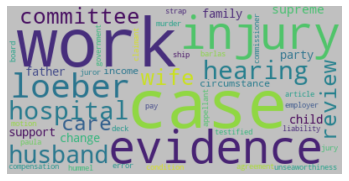

In [344]:
display_cloud(topic_1)

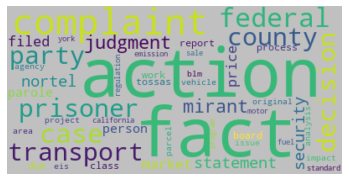

In [311]:
display_cloud(topic_2)

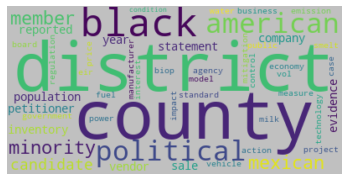

In [310]:
display_cloud(topic_3)

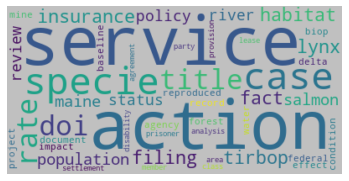

In [318]:
display_cloud(topic_4)

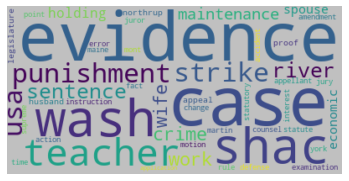

In [325]:
display_cloud(topic_5)

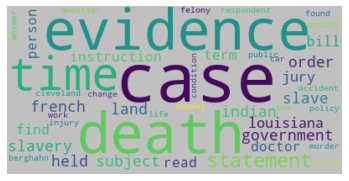

In [333]:
display_cloud(topic_6)